# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

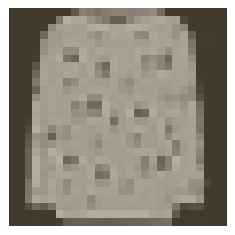

In [2]:
images, labels = next(iter(trainloader))
helper.imshow(images[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

>**Exercise 4.1:** Build your own network based on these suggestion.

Label: 8


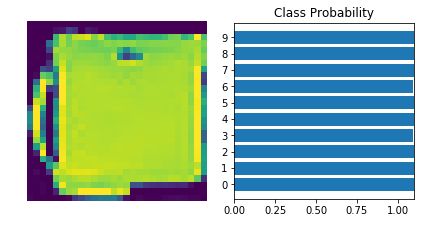

In [3]:
## Exercise 4.1:
## TODO: Define your network architecture here

from torch import nn

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.Softmax(dim=1))


images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

# Output of the network are log-probabilities
ps = torch.exp(model(img))
helper.view_classify(img.view(1, 28, 28), ps)
print("Label:", labels[0].item())

### Toinen testi versio

In [4]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(784, 128)
        self.hidden = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden(x))
        x = F.relu(self.output(x))
        
        return x
    
model = Network()

# Loss
criterion = nn.CrossEntropyLoss()

# flatten images
images = image.view(image.shape[0], -1)

# forward pass
logits = model(images)

# loss, by calculating logits and labels
loss = criterion(logits, label)

print(loss)

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)
print("Label:", labels[0].item())

NameError: name 'image' is not defined

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.


>**Exercise 4.2:** Create network (model), define loss (criterion) and define optimizer.
>
>**Exercise 4.3:** Train the network.
>
>**Exercise 4.4:** Calculate the class probabilities for network output.


In [4]:
## Exercise 4.2:
# TODO: Create the network, define the criterion and optimizer

from torch import optim

# Loss
criterion = nn.CrossEntropyLoss()
# Optimizer, learning rate 0.003
optimizer = optim.Adam(model.parameters(), lr=0.003)

print("Model:", model)
print("Loss:", criterion)
print("Optimizer", optimizer)

Model: Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)
Loss: CrossEntropyLoss()
Optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0
)


In [5]:
## Exercise 4.3:
# TODO: Train the network here (see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.)
# Calculate 5 epochs and print "Training Loss:" after every epoch


epochs = 5
for i in range(epochs):
    print(f'\nInitial weight mean for epoch {i}: {torch.mean(model[0].weight)}')
    running_loss = 0

    for img, labels in trainloader:
        images = img.view(img.shape[0], -1)

        # forward pass
        output = model(images)
        loss = criterion(output, labels)
        # backwards pass and update weights
        loss.backward()
        # update step and weights
        optimizer.step()
        # flush gradients
        optimizer.zero_grad()
        # add to the overall loss
        running_loss += loss.item()
    else:
        print(f'{20*"-"}Training loss: {running_loss/len(trainloader)}{20*"-"}')

    print(f'Updated weight mean for epoch {i}: {torch.mean(model[0].weight)}')


Initial weight mean for epoch 0: -1.5760448150103912e-05


/opt/conda/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


--------------------Training loss: 1.715255671345603--------------------
Updated weight mean for epoch 0: 0.005441947840154171

Initial weight mean for epoch 1: 0.005441947840154171
--------------------Training loss: 1.6575037502784973--------------------
Updated weight mean for epoch 1: 0.01080879382789135

Initial weight mean for epoch 2: 0.01080879382789135
--------------------Training loss: 1.6470341612535244--------------------
Updated weight mean for epoch 2: 0.014867742545902729

Initial weight mean for epoch 3: 0.014867742545902729
--------------------Training loss: 1.6458634628670048--------------------
Updated weight mean for epoch 3: 0.01628435216844082

Initial weight mean for epoch 4: 0.01628435216844082
--------------------Training loss: 1.6422913526929517--------------------
Updated weight mean for epoch 4: 0.018027720972895622


### 1 epoch loss: 1.7562691564244757
### 5 epoch loss: 1.653238230930971

Mietin, että voiko loss funktion arvoa käyttää tarkkana merkkinä neuroverkon tarkkuudesta ja että mikä olisi hyvän verkon merkki, ja löysin tälläisen mielipiteen:

https://www.quora.com/Is-it-acceptable-a-neural-network-trained-using-Tensorflow-with-a-loss-function-in-range-of-4-7-and-4-9?share=1

>Given that the acceptability of a loss function is actually application-dependent, rather than depending on the type of framework that you use, 0.4 may indicate a good result (in a system which varies from 0-100% ≈0.5) or a bad one in a system which has some internal level of randomness. In this second case, in fact, given all the parameters about its state, an outcome can be different. It can range from 0-10%. A perfect model (i.e. one where its performance is limited by the inherent variation) would get L≈0.18.
- Francesco Maggiore

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 3.1068e-16, 0.0000e+00, 8.9613e-34,
         0.0000e+00, 0.0000e+00, 2.2693e-37, 0.0000e+00]])
Label: 0


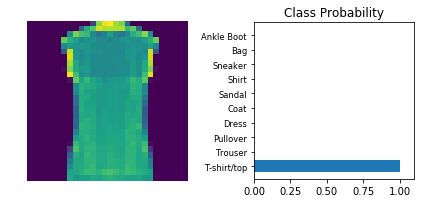

In [34]:
## Exercise 4.4: (see "Part 3 - Training Neural Networks (Exercises).ipynb" for tips.)

images, labels = next(iter(trainloader))
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
#img = img.resize_(images.shape[0], 1, 784)


# TODO: Calculate the class probabilities (softmax) for img

# Turn off gradients for performance
with torch.no_grad():
    logps = model(img)

print(logps)
# Softmax used as activation function
ps = logps
#ps = model.forward(img[0,:])

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
print("Label:", labels[0].item())

## Reflection

- Does network Training Loss decrease monotonously? And why this is important?
- Re-train network few times. Where network is unsure? How about if you train it only 1 epoch? 


- Kun training loss laskee tasaisesti, se meinaa, että verkko päivittää painoja oikein joka läpikäynnillä.

- Verkko näytti toimivan todella hyvin jopa yhdellä läpikäynnillä. Yhden T-paidan laittoi "shirt" ja ihan vähän "T-shirt/top". Korkokenkää vähän luuli lenkkariksi. Mekkoa vähän paidaksi.